# 12 機械学習の基礎（教師なし学習）　練習と総合問題解答

- **[12.1 教師なし学習](#12.1-教師なし学習)** 
    - [12.1.1 クラスタリング(クラスター分析）](#12.1.1-クラスタリング)
    - [12.1.2 次元圧縮（主成分分析）](#12.1.2-次元圧縮)
    - [12.1.3 バスケット分析とアソシエーションルール](#12.1.3-バスケット分析とアソシエーションルール)
<br><br>
- **[12.2 総合問題](#12.2-総合問題)**
    - [12.2.1 総合問題1](#12.2.1-総合問題1)
    - [12.2.2 総合問題2](#12.2.2-総合問題2)

In [1]:
# 途中で使用するため、あらかじめ読み込んでおいてください。
# データ加工・処理・分析モジュール
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series,DataFrame
import pandas as pd

# 可視化モジュール
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 機械学習モジュール
import sklearn

# 小数第３まで表示
%precision 3

'%.3f'

## 12.1 教師なし学習
ゴール：教師なし学習のクラスタリング(非階層と階層)、次元圧縮、パターンマイニングの基本を理解し、簡単な実装ができる

### 12.1.1 クラスタリング
キーワード：非階層型、階層型、k-means、k-means++

####  <練習問題 1>
先ほど扱ったmake_blobsデータに対して、random_state=52にしてデータをグラフ化してみましょう。そこからクラスター分析をしてください。いくつのグループに分けますか。また分けた後は、クラスター番号がわかるように色分けして、グラフ化してください。

解答

以下のグラフより、クラスター数は2が良さそうです。

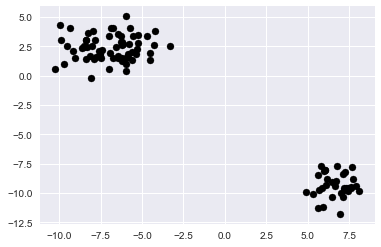

In [12]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X,y = make_blobs(random_state=52)

plt.scatter(X[:,0],X[:,1],color='black')

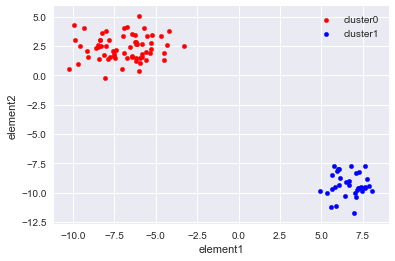

In [13]:
kmeans = KMeans(init='random',n_clusters=2)
kmeans.fit(X)

y_pre = kmeans.fit_predict(X)

# 順にx座標、y座標、cluster番号のデータを横に結合するためconcatでaxis=1を指定しています。
merge_data = pd.concat([pd.DataFrame(X[:,0]),pd.DataFrame(X[:,1]),pd.DataFrame(y_pre)]
                       ,axis=1)


# elementが属性、clusterがクラスター番号
merge_data.columns = ["element1","element2","cluster"]

# クラスターごとにデータを分ける
merge_data_cluster0 = merge_data[merge_data["cluster"]==0]
merge_data_cluster1 = merge_data[merge_data["cluster"]==1]

# 色つけてグラフ化
ax =merge_data_cluster0.plot.scatter(x='element1', y='element2', color='red', label='cluster0');
merge_data_cluster1.plot.scatter(x='element1', y='element2', color='blue', label='cluster1',ax=ax);

念のため、エルボー法で、どのクラスター数が良いか見てみましょう。

In [16]:
# エルボー法
dist_list =[]
for i in range(1,10):
    kmpp = KMeans(n_clusters=i,init='random',n_init=5,max_iter=100,random_state=0)
    kmpp.fit(X)
    dist_list.append(kmpp.inertia_)

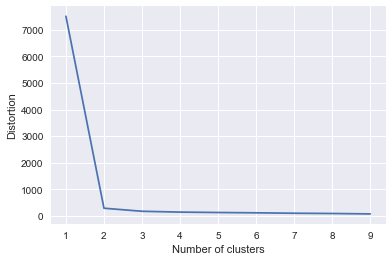

In [18]:
plt.plot(range(1,10),dist_list,marker='+')
plt.xlabel("Number of clusters")
plt.ylabel("Distortion")

やはりクラスター数は2が良いようです。

####  <練習問題 2>
上記と同じデータbanking_c_data_subに対して、クラスター数を4にしてクラスター分析を実行した場合(kmeans)に、どのような結果になりますか？先ほどと同じようにクラスター番号を取得した後は、それぞれのクラスターがどのようなグループになっているか深堀分析をして、それぞれのグループのペルソナ（顧客像）を述べましょう。またクラスター数を8にした場合はどうでしょうか。さらに、age、balance、campaign、previous以外の変数を選んだ場合はどうでしょうか。使う変数を選んで、同じようにクラスター分析を実行して、その結果を深掘りし、考察してください。

解答略

### 12.1.2 次元圧縮
キーワード：PCA

####  <練習問題 1>
前章の機械学習（教師あり学習）の総合問題でも扱ったsklearnのdatasetsからload_iris(アヤメの花)を読み込んで、iris.dataを対象にPCAを実行してください。またPCAの第2成分までのデータと、目的変数（iris.target）との関係性はどうでしょうか。グラフ化してみるなどして、考察してください。

解答

データ（iris.data）を読み込み、標準化をした後に、PCAを実行しています。変数は4つあり、2つに圧縮しています。

In [7]:
# 分析対象データ
from sklearn.datasets import load_iris

# data
iris = load_iris()

# 標準化のためのモジュール
from sklearn.preprocessing import StandardScaler

# PCA
from sklearn.decomposition import PCA

# データの標準化
sc = StandardScaler()
sc.fit(iris.data)
X_scaled = sc.transform(iris.data)

# 主成分分析の実行
pca = PCA(n_components=2)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

2つの変数がアウトプットされています。

In [9]:
X_pca

array([[ -2.265e+00,   5.057e-01],
       [ -2.086e+00,  -6.554e-01],
       [ -2.368e+00,  -3.185e-01],
       [ -2.304e+00,  -5.754e-01],
       [ -2.389e+00,   6.748e-01],
       [ -2.071e+00,   1.519e+00],
       [ -2.446e+00,   7.456e-02],
       [ -2.234e+00,   2.476e-01],
       [ -2.342e+00,  -1.095e+00],
       [ -2.189e+00,  -4.486e-01],
       [ -2.163e+00,   1.071e+00],
       [ -2.327e+00,   1.586e-01],
       [ -2.224e+00,  -7.091e-01],
       [ -2.640e+00,  -9.383e-01],
       [ -2.192e+00,   1.890e+00],
       [ -2.251e+00,   2.722e+00],
       [ -2.203e+00,   1.514e+00],
       [ -2.190e+00,   5.143e-01],
       [ -1.894e+00,   1.431e+00],
       [ -2.340e+00,   1.158e+00],
       [ -1.915e+00,   4.305e-01],
       [ -2.205e+00,   9.525e-01],
       [ -2.774e+00,   4.895e-01],
       [ -1.820e+00,   1.068e-01],
       [ -2.228e+00,   1.622e-01],
       [ -1.957e+00,  -6.079e-01],
       [ -2.052e+00,   2.660e-01],
       [ -2.168e+00,   5.520e-01],
       [ -2.140e+00,

前に扱ったガンデータと同じように、目的変数となるデータフレームをマージして、グラフ化してみます。なお、ここでは目的変数が0（setosa）とそれ以外で分けて考えることにします。x軸が第1成分、y軸が第2成分で色が0が赤、それ以外が青としています。なお、ターゲット0がsetosa、1がversicolor、2がvirginicaになります。以下はsetosa（赤）かそうでないかを見ています。

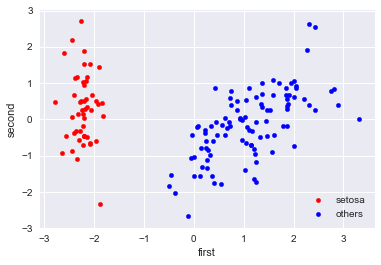

In [11]:
merge_data = pd.concat([pd.DataFrame(X_pca[:,0]),pd.DataFrame(X_pca[:,1]),pd.DataFrame(iris.target)]
                       ,axis=1)
merge_data.columns = ["first","second","target"]

merge_data_0 = merge_data[merge_data["target"]==0]
merge_data_others = merge_data[merge_data["target"]!=0]

ax0 =merge_data_0.plot.scatter(x='first', y='second', color='red', label='setosa');
merge_data_others.plot.scatter(x='first', y='second', color='blue', label='others',ax=ax0);

なお、参考ですが、以下は目的変数とそれぞれの4つの説明変数との関係を示した図です。以下よりsetosaを見分けるだけでしたら、他の変数（petal lengthなど）でも閾値を決めて、見分けることができそうです。

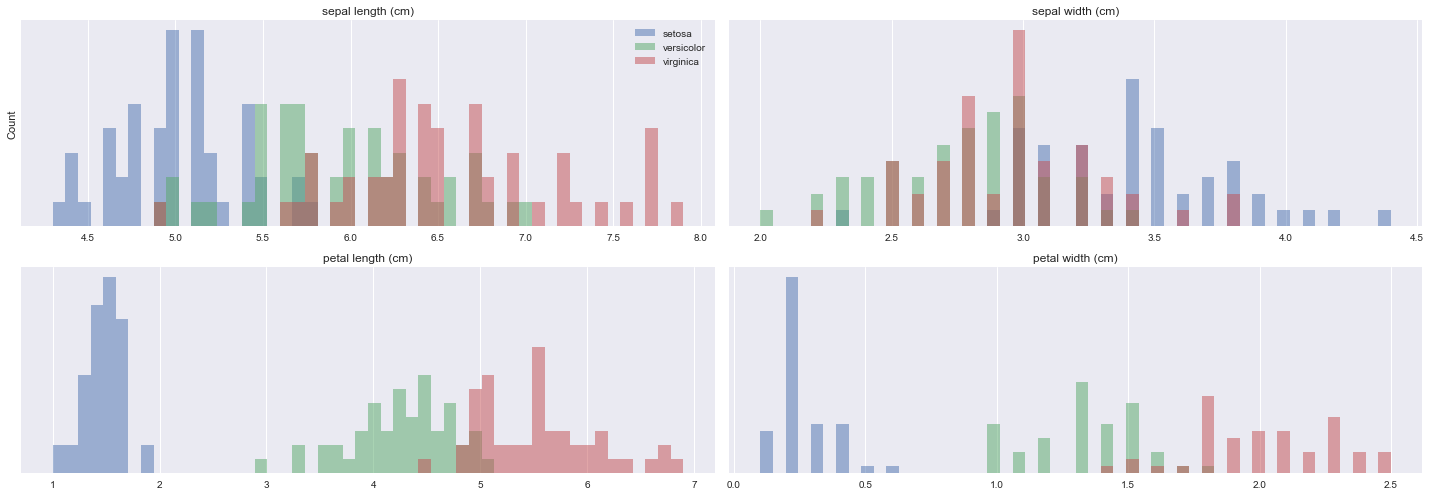

In [21]:
fig, axes = plt.subplots(2,2,figsize=(20,7))

iris_0 = iris.data[iris.target==0]
iris_1 = iris.data[iris.target==1]
iris_2 = iris.data[iris.target==2]

ax = axes.ravel()
for i in range(4):
    _,bins = np.histogram(iris.data[:,i],bins=50)
    ax[i].hist(iris_0[:,i],bins=bins,alpha=.5)
    ax[i].hist(iris_1[:,i],bins=bins,alpha=.5)
    ax[i].hist(iris_2[:,i],bins=bins,alpha=.5)
    ax[i].set_title(iris.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_ylabel("Count")
ax[0].legend(["setosa","versicolor","virginica"],loc="best")
fig.tight_layout()

### 12.1.3 バスケット分析とアソシエーションルール
キーワード：アソシエーションルール、支持度、確信度、リフト値

####  <練習問題 1>
解答略　

例題の解説を参考に、商品を2つ選んで、計算してみてください。

## 12.2 総合問題

### 12.2.1 総合問題1
略

### 12.2.2 総合問題2
上記の購買データ（onlineRetailデータ）を使って、どの商品とどの商品の組み合わせの支持度が一番高いですか？ただし、レコード数が1000より多い商品（StockCode）を対象に計算してください。（ヒント：商品の組み合わせを抽出するときは、itertoolsモジュールを使います。）

解答

まずはデータの準備です（前の処理でやっている場合はスキップしてください。同じ処理です）。

In [ ]:
import requests

file_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx"
resp = requests.get(file_url)

#onlineRetail.xlsというファイル名で作成
output = open("onlineRetail.xls", 'wb')
output.write(resp.content)
output.close()

In [3]:
# 以下、上と同じ
online_retail_data = pd.ExcelFile("onlineRetail.xls")

# シートを指定する
online_retail_data_table = online_retail_data.parse('Online Retail')
online_retail_data_table.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
online_retail_data_table['cancel_flg'] = online_retail_data_table.InvoiceNo.map(lambda x:str(x)[0])
online_retail_data_table = online_retail_data_table[(online_retail_data_table.cancel_flg == '5') 
                                                    & (online_retail_data_table.CustomerID.notnull())]

それぞれのStockコードの組み合わせで、計算をしていき、ここではitertoolsを使います。これは組み合わせを取り出したい場合などに便利なモジュールです。

In [5]:
import itertools

# 結果を保存しておくための辞書
all_result={}

# レコードが1000より大きいもので絞る
indexer = online_retail_data_table.StockCode.value_counts() > 1000
l = online_retail_data_table.StockCode.value_counts()[indexer.index[indexer]].index

support_max = 0

# 上記「l」のデータから2つ取り出すための処理
for element in itertools.combinations(l, 2):
    
    online_retail_data_table_first = online_retail_data_table[online_retail_data_table["StockCode"]==element[0]]
    online_retail_data_table_second = online_retail_data_table[online_retail_data_table["StockCode"]==element[1]]
    
    merge_one_second = pd.merge(online_retail_data_table_first
                   ,online_retail_data_table_second
                   ,on="InvoiceNo"
                   ,how="inner")
    
    support = len(merge_one_second.InvoiceNo.unique()) / len(online_retail_data_table.InvoiceNo.unique())
    
    result = "support:"+str(support)
    all_result[element] = result
    
    if support_max < support:
        support_max = support
        support_max_commodites = element

結果を見てみましょう。

In [7]:
support_max_commodites

(20725, 22383)

StockCodeが20725と22383の場合に一番支持度が高いようです。

In [8]:
all_result[support_max_commodites]

'support:0.027999568407423393'

In [9]:
support_max

0.028

ちなみに、それぞれの商品名を見てみましょう。LUNCH BAG RED RETROSPOTとLUNCH BAG SUKI  DESIGNでした。

In [21]:
online_retail_data_table[online_retail_data_table["StockCode"]==20725]["Description"].head(1)

93    LUNCH BAG RED RETROSPOT
Name: Description, dtype: object

In [23]:
online_retail_data_table[online_retail_data_table["StockCode"]==22383]["Description"].head(1)

411    LUNCH BAG SUKI  DESIGN 
Name: Description, dtype: object